In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("advertising.csv")

In [3]:
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [5]:
data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [6]:
data.isna().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [7]:
data.duplicated().sum()

0

**Lets check the correlation between each variables**

In [8]:
data.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


<Axes: xlabel='TV', ylabel='Sales'>

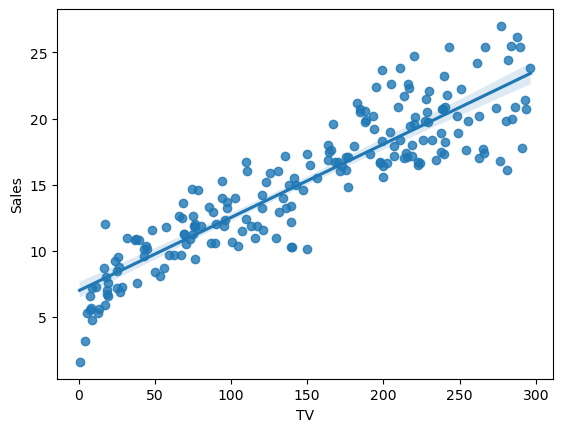

In [9]:
sns.regplot(x=data.TV, y=data.Sales)

<Axes: xlabel='Radio', ylabel='Sales'>

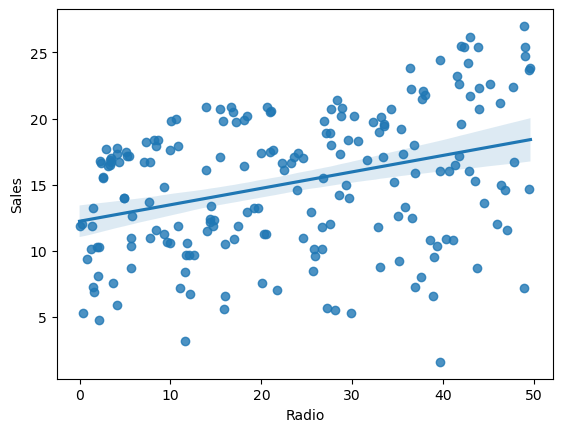

In [10]:
sns.regplot(x=data.Radio, y=data.Sales)

<Axes: xlabel='Newspaper', ylabel='Sales'>

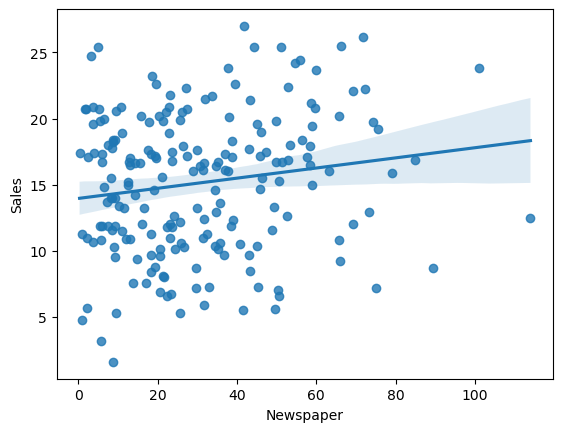

In [11]:
sns.regplot(x=data.Newspaper, y=data.Sales)

In [12]:
X = data.drop("Sales", axis=1)
y = data.Sales

In [13]:
X.head()

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [14]:
y

0      22.1
1      10.4
2      12.0
3      16.5
4      17.9
       ... 
195     7.6
196    14.0
197    14.8
198    25.5
199    18.4
Name: Sales, Length: 200, dtype: float64

**Step 2-Splitting the dataset into training and testing set**

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1234)

In [16]:
from sklearn.linear_model import LinearRegression
mlr = LinearRegression()

# Training the Model

In [17]:
mlr.fit(X_train, y_train)

LinearRegression()

In [18]:
mlr.coef_

array([0.05502764, 0.10385605, 0.00199075])

In [19]:
mlr.intercept_

4.6888578081260075

# Prediction on Training Data : Training Accuracy

In [20]:
y_train_pred = mlr.predict(X_train)

In [21]:
pd.DataFrame({"Original":y_train, "Predicted":y_train_pred})

,Original,Predicted
97,20.5,17.088243
66,11.0,8.981467
122,16.6,17.295360
49,9.7,9.658583
130,1.6,8.857396
...,...,...
152,16.6,18.010435
116,12.2,13.884810
53,21.2,19.651912
38,10.1,9.903381


In [22]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [23]:
mean_absolute_error(y_train, y_train_pred)

1.2676377496340203

In [24]:
mean_squared_error(y_train, y_train_pred)

2.788360146875699

In [25]:
r2_score(y_train, y_train_pred)

0.8988313729462195

# Prediction on Testing Data : Testing Accuracy

In [26]:
y_test_pred = mlr.predict(X_test)

In [27]:
pd.DataFrame({"Original":y_test, "Predicted":y_test_pred})

,Original,Predicted
197,14.8,15.407353
157,10.1,13.115387
31,11.9,12.785417
48,19.8,18.931402
63,14.0,13.431058
59,18.4,19.365450
5,7.2,10.395466
7,13.2,13.361852
117,9.4,9.005518
108,5.3,5.502226


In [28]:
mean_absolute_error(y_test, y_test_pred)

1.185073624881626

In [29]:
mean_squared_error(y_test, y_test_pred)

2.5830433168525193

In [30]:
r2_score(y_test, y_test_pred)

0.9086422633495853

In [31]:
print("Variance Score : %2.f" %mlr.score(X_train, y_train))

Variance Score :  1


In [32]:
def prediction_invest(tv, radio, newspaper):
    record = pd.DataFrame({
        "TV":[tv],
        "Radio":[radio], 
        "Newspaper":[newspaper]
    })
    print(record)
    return mlr.predict(record)

In [33]:
tv = float(input("How much you invest for TV marketing?"))
radio = float(input("How much you invest for Rdio marketing"))
newspaper = float(input("How much you invest for Newspaper marketing?"))
print(f"Our model says your prediction sale is : {prediction_invest(tv, radio, newspaper)[0]}")

How much you invest for TV marketing? 300
How much you invest for Rdio marketing 400
How much you invest for Newspaper marketing? 500


      TV  Radio  Newspaper
0  300.0  400.0      500.0
Our model says your prediction sale is : 63.734948209563036


In [34]:
import pickle

In [35]:
pickle.dump(mlr, open("Multiple_Linear_Regression.sav", 'wb'))

In [36]:
multiple_linear_model = pickle.load(open("Multiple_Linear_Regression.sav", 'rb'))

In [37]:
!pip install scikit-learn joblib pandas

Defaulting to user installation because normal site-packages is not writeable
  Using cached scikit_learn-1.7.2-cp314-cp314-win_amd64.whl.metadata (11 kB)
  Using cached joblib-1.5.2-py3-none-any.whl.metadata (5.6 kB)
  Using cached pandas-2.3.3-cp314-cp314-win_amd64.whl.metadata (19 kB)
  Using cached numpy-2.3.4-cp314-cp314-win_amd64.whl.metadata (60 kB)
  Using cached scipy-1.16.3-cp314-cp314-win_amd64.whl.metadata (60 kB)
  Using cached threadpoolctl-3.6.0-py3-none-any.whl.metadata (13 kB)
  Using cached python_dateutil-2.9.0.post0-py2.py3-none-any.whl.metadata (8.4 kB)
  Using cached pytz-2025.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2025.2-py2.py3-none-any.whl.metadata (1.4 kB)
  Using cached six-1.17.0-py2.py3-none-any.whl.metadata (1.7 kB)
Using cached scikit_learn-1.7.2-cp314-cp314-win_amd64.whl (8.8 MB)
Using cached joblib-1.5.2-py3-none-any.whl (308 kB)
Using cached pandas-2.3.3-cp314-cp314-win_amd64.whl (11.1 MB)
Using cached numpy-2.3.4-cp314-cp314-win

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.

[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip
